# Viewership analysis of Brooklyn 9-9 a popular TV Show

![alt text](Brooklyn_Nine-Nine_Logo.png "Title")

## Description

**"Brooklyn Nine-Nine"** is a comedy series that follows the misadventures of the detectives of the *99th precinct* of the New York City Police Department in Brooklyn. Led by the quirky and talented Detective **Jake Peralta** (played by Andy Samberg), the precinct is filled with a diverse cast of characters, including the no-nonsense **Captain Raymond Holt** (played by Andre Braugher), the tough but kind-hearted Detective **Rosa Diaz** (played by Stephanie Beatriz), the food-loving Detective **Charles Boyle** (played by Joe Lo Truglio), the ambitious and nerdy Detective **Amy Santiago** (played by Melissa Fumero), the eccentric administrative assistant **Gina Linetti** (played by Chelsea Peretti), and the laid-back Sergeant **Terry Jeffords** (played by Terry Crews). Together, they solve crimes, navigate office politics, and form an unbreakable bond, all while delivering laughs and heartfelt moments. With its witty humor, lovable characters, and clever writing, "Brooklyn Nine-Nine" has become a beloved sitcom known for its blend of comedy and heart.

*I highly recommend watching Brooklyn 9-9 in your free time!*

***Nine! Nine!***

# Analysis

## Average viewers per season

The plot below shows a steady decay of milion of viewers that watched each season of the series.

Overall the series can be called a success with its peak of more than 8M viewers and minimum of around 2M viewers.


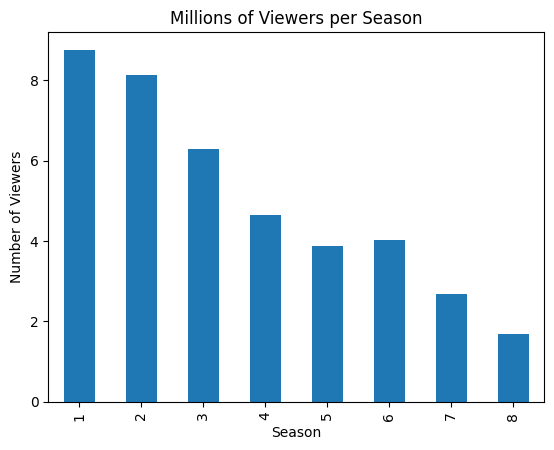

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
df = pd.read_csv('brooklyn99_episodes.csv')

# Group data by season and calculate the sum of viewers
season_viewers = df.groupby('season')['us_viewers'].sum()/10e6
# Create a bar plot
season_viewers.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Number of Viewers')
plt.title('Millions of Viewers per Season')
plt.show()


## Viewership per episode

Given the granularity of thedata we can get even more insights into the viewership trends.

We can notice the high value of 1.4M of viewers for episode 17 season 1. This is an anomaly that I couldn't find out a reason for. It was not the final episode of the season which would make much sense.

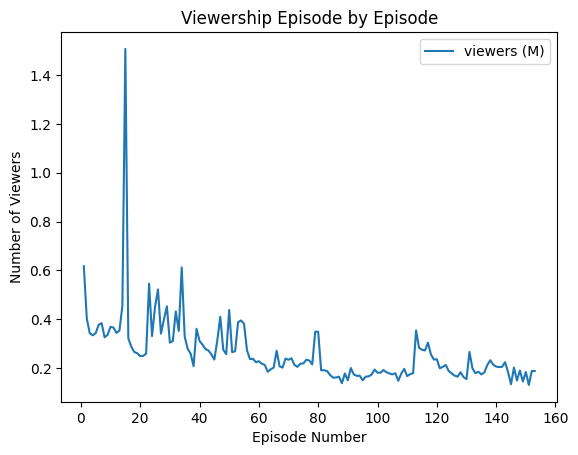

In [15]:
# Sort the dataframe by season and episode
df_sorted = df.sort_values(['season', 'episode_num_overall'])

# Create a line plot
df_sorted['viewers (M)'] = df_sorted['us_viewers'] / 10e6
df_sorted.plot(x='episode_num_overall', y='viewers (M)', kind='line')

# Set the plot title and labels
plt.title('Viewership Episode by Episode')
plt.xlabel('Episode Number')
plt.ylabel('Number of Viewers')

# Display the plot
plt.show()


## Differences episode to episode

Given the outlier of S1E17 we could expect the high increase and decrease of the number of vierwers for the next episode.

Other than that we can see an initial increase for the series and then the outlier peak followed by stochastic decrease.

The time series seems to be integrated with order of 1 which could be tested with ADS of KPFF tests. 

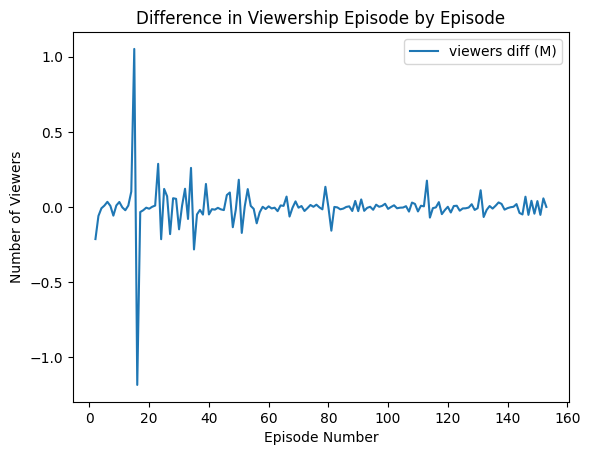

In [20]:
# Sort the dataframe by season and episode
df_sorted = df.sort_values(['season', 'episode_num_overall'])

# Create a line plot
df_sorted['viewers (M)'] = df_sorted['us_viewers'] / 10e6
df_sorted['viewers diff (M)'] = df_sorted['viewers (M)'] - df_sorted['viewers (M)'].shift()
df_sorted.plot(x='episode_num_overall', y='viewers diff (M)', kind='line')

# Set the plot title and labels
plt.title('Difference in Viewership Episode by Episode')
plt.xlabel('Episode Number')
plt.ylabel('Number of Viewers')

# Display the plot
plt.show()


## Sources:
- Data: https://www.kaggle.com/code/bcruise/brooklyn-99-imdb-ratings/input?scriptVersionId=80873732
- Facts: https://en.wikipedia.org/wiki/Brooklyn_Nine-Nine
